In [1]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def hillshade(array, azimuth=315, angle_altitude=45):
    az = np.deg2rad(azimuth)
    alt = np.deg2rad(angle_altitude)

    x, y = np.gradient(array.astype(float))
    slope = np.pi / 2.0 - np.arctan(np.sqrt(x * x + y * y))
    aspect = np.arctan2(-x, y)

    shaded = (np.sin(alt) * np.sin(slope) +
              np.cos(alt) * np.cos(slope) * np.cos(az - aspect))
    return 255 * (shaded + 1) / 2


def resample_to_resolution(src, new_resolution):
    transform, width, height = calculate_default_transform(
        src.crs, src.crs,
        src.width, src.height,
        *src.bounds,
        resolution=new_resolution
    )

    profile = src.profile.copy()
    profile.update({
        "height": height,
        "width": width,
        "transform": transform
    })

    data_resampled = np.empty((height, width), dtype=src.profile["dtype"])

    reproject(
        source=rasterio.band(src, 1),
        destination=data_resampled,
        src_transform=src.transform,
        src_crs=src.crs,
        dst_transform=transform,
        dst_crs=src.crs,
        resampling=Resampling.bilinear
    )

    return data_resampled, profile


In [4]:
src_path = "dados/rec_geosampa.tif"  # troque pelo caminho do TIFF GeoSampa

with rasterio.open(src_path) as src:
    data_05m = src.read(1)

    data_10m, profile_10m = resample_to_resolution(src, 10)
    data_30m, profile_30m = resample_to_resolution(src, 30)

    # --- salvar os reamostrados em disco ---
    with rasterio.open("rec_geosampa_10m.tif", "w", **profile_10m) as dst:
        dst.write(data_10m, 1)

    with rasterio.open("rec_geosampa_30m.tif", "w", **profile_30m) as dst:
        dst.write(data_30m, 1)

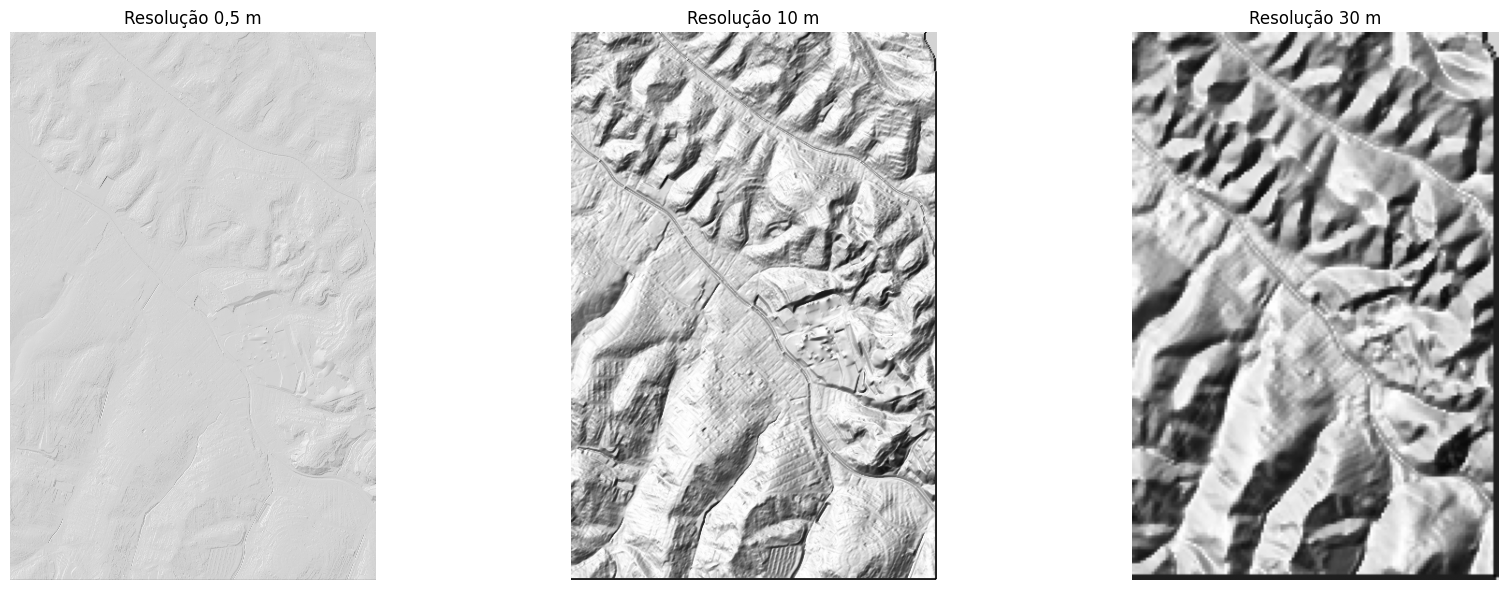

In [5]:
# ---------- Hillshade ----------
hs_05 = hillshade(data_05m)
hs_10 = hillshade(data_10m)
hs_30 = hillshade(data_30m)

# ---------- Plot ----------
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(hs_05, cmap="gray")
axes[0].set_title("Resolução 0,5 m")
axes[0].axis("off")

axes[1].imshow(hs_10, cmap="gray")
axes[1].set_title("Resolução 10 m")
axes[1].axis("off")

axes[2].imshow(hs_30, cmap="gray")
axes[2].set_title("Resolução 30 m")
axes[2].axis("off")

plt.tight_layout()
plt.show()

d:\git\capstone_ipt\venv\Lib\site-packages\matplotlib\colors.py:778: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


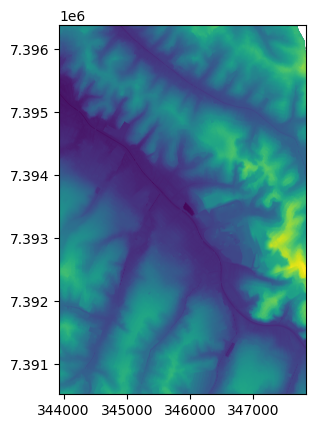

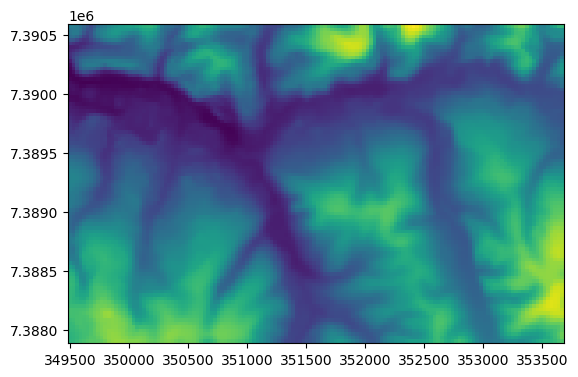

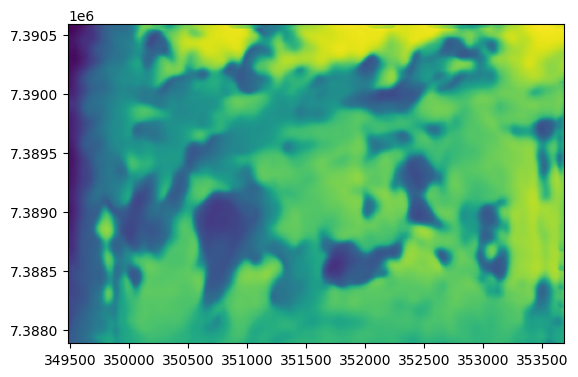

<Axes: >

In [3]:
import os
import rasterio
from rasterio.plot import show
data_dir = "dados"
fp = os.path.join(data_dir, "rec_geosampa.tif")
reprojected = rasterio.open(fp)
show(reprojected)
fp = os.path.join(data_dir, "rec_anadem_teste.tif")
reprojected = rasterio.open(fp)
show(reprojected)
fp = "output_10m.tif"
reprojected = rasterio.open(fp)
show(reprojected)

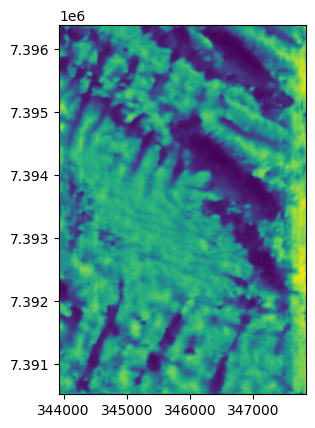

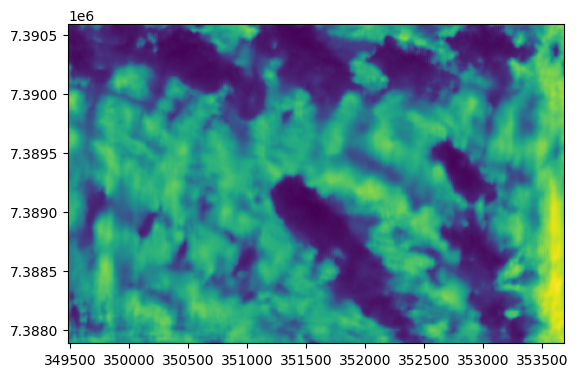

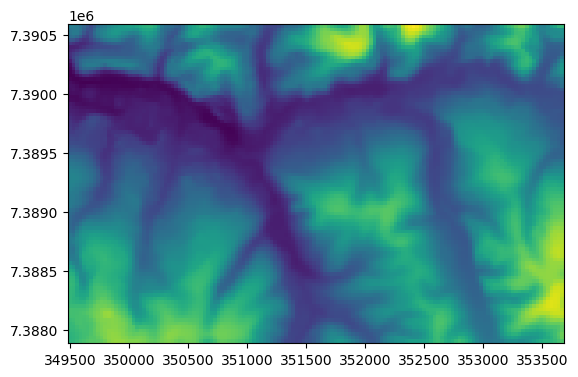

<Axes: >

In [1]:
import os
import rasterio
from rasterio.plot import show
data_dir = "output"
fp = os.path.join(data_dir, "anadem_16f_40ep_10m.tif")
reprojected = rasterio.open(fp)
show(reprojected)
fp = os.path.join(data_dir, "anadem_teste_16f_40ep_10m.tif")
reprojected = rasterio.open(fp)
show(reprojected)
fp = "dados/rec_anadem_teste.tif"
reprojected = rasterio.open(fp)
show(reprojected)